In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from funciones_EDA import *

In [25]:
df_malaga = pd.read_csv("../data/dataset_viajeros_procesado.csv", encoding= "latin1", sep= ";")
df_malaga.drop(columns="Unnamed: 0", inplace=True)

Buscamos la tendencia central:

In [26]:
df_malaga.PAIS_ORIGEN.mode()  # obtenemos 4 países empatados entre los más frecuentes

0        Alemania
1         Irlanda
2    Países Bajos
3     Reino Unido
Name: PAIS_ORIGEN, dtype: object

In [27]:
numericas = ["TURISTAS", "PERNOCTACIONES", "ESTANCIA_MEDIA"]
df_malaga[numericas].describe()

,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
count,45.000000,4.500000e+01,45.000000
mean,71296.044444,5.224720e+05,7.252222
std,62269.492028,4.541685e+05,0.866022
min,21590.000000,1.645330e+05,5.550000
25%,39391.000000,2.717980e+05,6.600000
50%,48578.000000,3.497620e+05,7.200000
75%,60493.000000,4.983790e+05,7.900000
max,228875.000000,1.938169e+06,8.900000


In [28]:
# VALORES TOTALES en los meses de temporada:

total_turistas = df_malaga.groupby(["PAIS_ORIGEN"])["TURISTAS"].sum().sum()
total_pernoc = df_malaga.groupby(["PAIS_ORIGEN"])["PERNOCTACIONES"].sum().sum()
global_estancia_media = df_malaga.groupby(["PAIS_ORIGEN"])["ESTANCIA_MEDIA"].mean().mean()

print("Datos de la provincia de Málaga durante los meses de temporada en 2024 (de abril a octubre):")
print(f"Total de TURISTAS: {total_turistas}")
print(f"Total de PERNOCTACIONES: {total_pernoc}")
print(f"Duracion estancia media en 2024: {round(global_estancia_media,2)}")

Datos de la provincia de Málaga durante los meses de temporada en 2024 (de abril a octubre):
Total de TURISTAS: 3208322.0
Total de PERNOCTACIONES: 23511240.0
Duracion estancia media en 2024: 7.33


In [29]:
# Así lo vemos más al detalle:

df_malaga.describe().mean()

MES                   11.150194
TURISTAS           66567.192059
PERNOCTACIONES    524915.814767
ESTANCIA_MEDIA        11.158531
dtype: float64

In [30]:
df_malaga.describe().loc["50%"] # Gran diferencia entre mediana y media, lo que denota una gran dispersión en los datos

MES                    7.0
TURISTAS           48578.0
PERNOCTACIONES    349762.0
ESTANCIA_MEDIA         7.2
Name: 50%, dtype: float64

In [31]:
df_malaga.describe().max()

MES                    45.0
TURISTAS           228875.0
PERNOCTACIONES    1938169.0
ESTANCIA_MEDIA         45.0
dtype: float64

Ahora buscamos las frecuencias:

In [32]:
# Frecuencias absolutas:

# Nos interesa sobre todo el campo PAIS_ORIGEN, ya que hemos agrupado los meses por temporadas en el tratamiento previo de los datos. Aún así echamos un vistazo a las frecuencias

categoricas = ["MES","PAIS_ORIGEN","TEMPORADA"]

for categoria in categoricas:
    print(f"Para el campo '{categoria}':")
    print(df_malaga[categoria].value_counts())
    print("\n"*2)

Para el campo 'MES':
MES
4     8
10    8
5     7
9     7
7     6
8     5
6     4
Name: count, dtype: int64



Para el campo 'PAIS_ORIGEN':
PAIS_ORIGEN
Reino Unido     7
Irlanda         7
Alemania        7
Países Bajos    7
Francia         6
Suecia          5
Bélgica         4
Dinamarca       2
Name: count, dtype: int64



Para el campo 'TEMPORADA':
TEMPORADA
Pre-Temporada     15
Temporada Alta    15
Post-Temporada    15
Name: count, dtype: int64





In [33]:
#Frecuencias relativas, realmente la única variable que nos interesa es la de país de origen:

relativas = df_malaga.PAIS_ORIGEN.value_counts(normalize=True)*100
relativas

PAIS_ORIGEN
Reino Unido     15.555556
Irlanda         15.555556
Alemania        15.555556
Países Bajos    15.555556
Francia         13.333333
Suecia          11.111111
Bélgica          8.888889
Dinamarca        4.444444
Name: proportion, dtype: float64

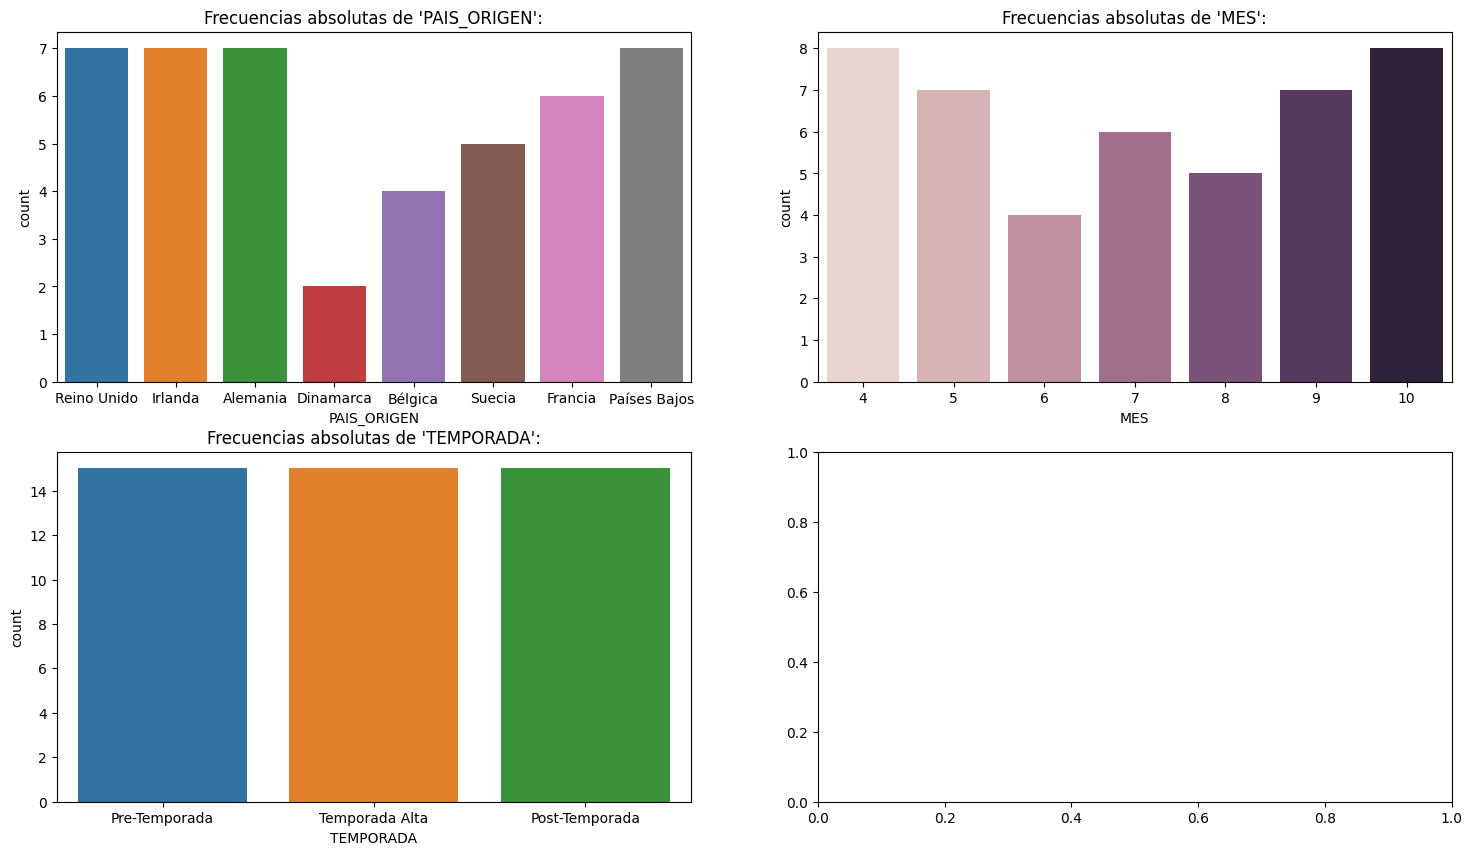

In [34]:
# función del módulo funciones_EDA:

pinta_categoricas(df_malaga, columnas= ["PAIS_ORIGEN","MES","TEMPORADA"])

# Obtenemos los mismos datos que observábamos con la moda, los turistas que más nos visitan provienen de Alemania, Irlanda, Países Bajos y Reino Unido. 
# Los datos están distribuidos equitativamente por temporadas pero no por meses. Recordemos que de cada temporada hemos escogido los 15 mayores registros numéricos de turistas

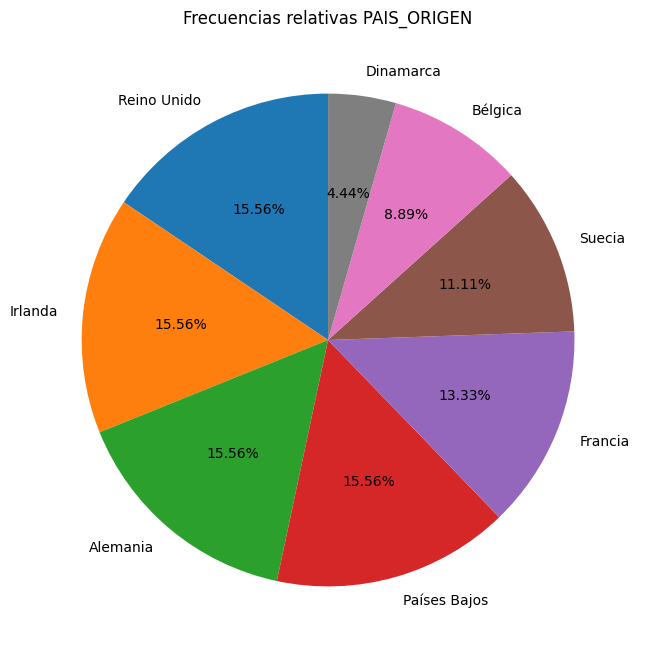

In [35]:
# Veamos las frecuencias relativas de PAIS_ORIGEN con otra gráfica distinta, esta vez en forma de tarta:


data = df_malaga["PAIS_ORIGEN"].value_counts()

fig,ax = plt.subplots(figsize = (8,8))

ax.pie(data.values,
        labels=data.index,
        autopct='%.2f%%', startangle= 90)
ax.set_title("Frecuencias relativas PAIS_ORIGEN");

In [36]:
fig.savefig("../img/frecuencias_relativas")

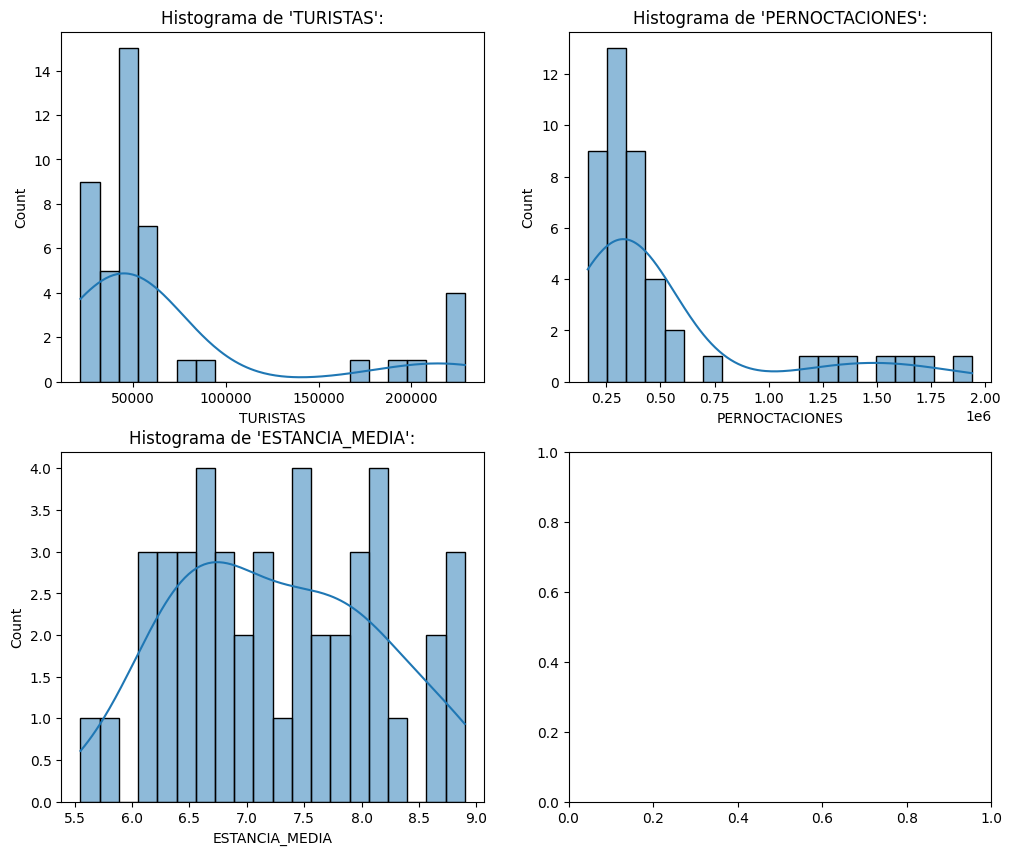

In [37]:
# otra función de mi módulo funciones-EDA:

pinta_histograma(df_malaga, columnas= numericas, bins= 20, kde= True)

# Las curvas de las variables 'TURISTAS' y 'PERNOCTACIONES' son prácticamente iguales. La mayor parte de los registros se concentran en los valores
# correspondientes al tercio más bajo de la gráfica 

# La curva de "ESTANCIA_MEDIA"es similar, aunque, sin ser perfecta, recuerda más a una forma Gaussiana


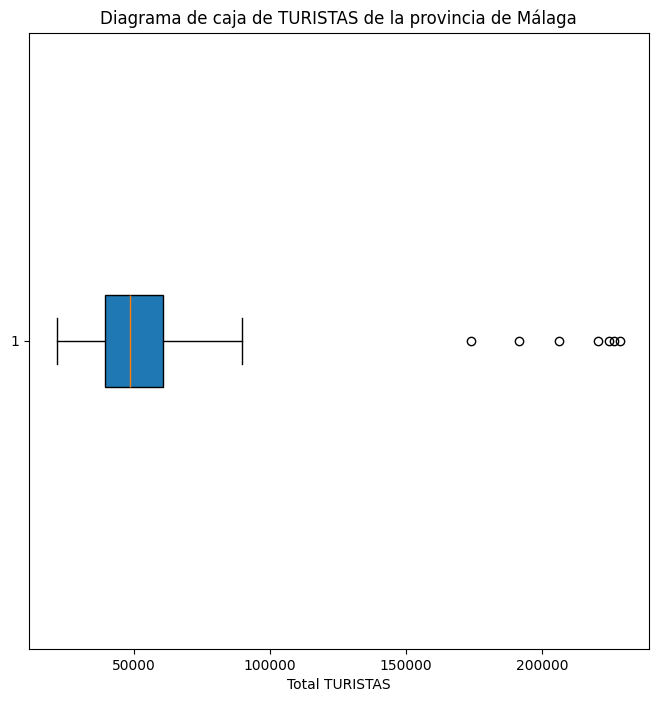

In [38]:
# otra función del módulo funciones_EDA

pinta_boxplot(df_malaga, "TURISTAS")

# Vemos que los registros se concentran alrededor de los 50.000 (por encima y por debajo). Encontramos outliers muy alejados del umbral max, 
# que rozan los 200.000

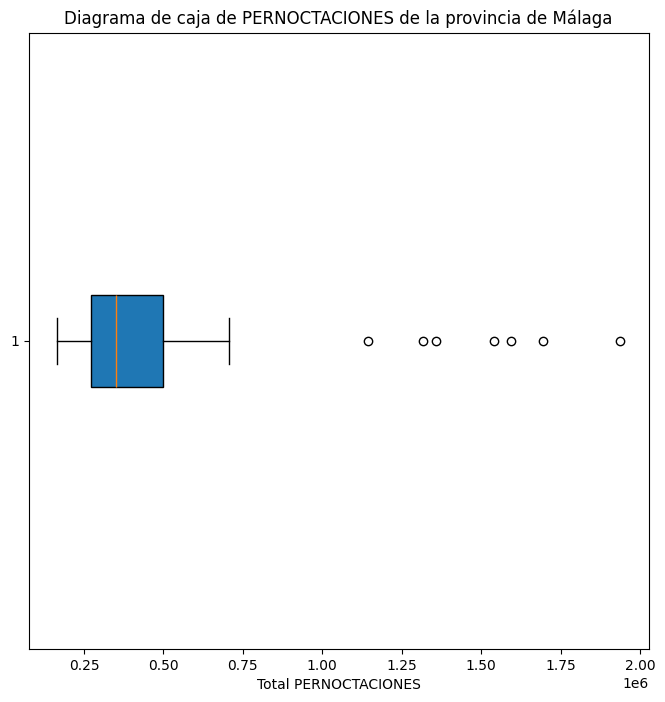

In [39]:
pinta_boxplot(df_malaga, "PERNOCTACIONES")

# La distribución de datos es prácticamente pareja a la de turistas, salvo que los outliers no están tan concentrados.

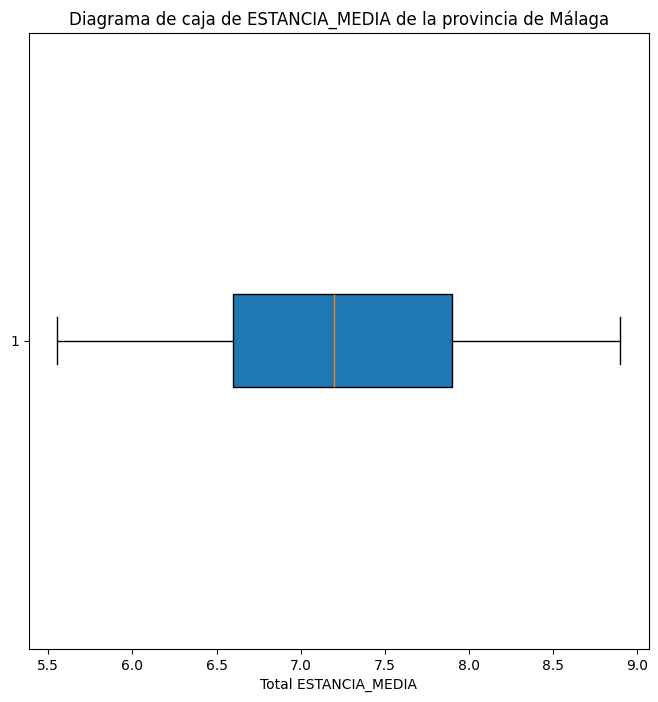

In [40]:
pinta_boxplot(df_malaga, "ESTANCIA_MEDIA")

# Todos los datos de estancia media se encuentran en el mismo bloque de 6.5 a 8 días